In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [3]:
# Membaca dataset
data = pd.read_csv('students.csv')

# Melihat beberapa baris pertama
print(data.head())

   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mothers qualification  Fathers qualification  Mothers occupation  ...  \
0                     13                     10                   6  ...   
1                      1      

In [4]:
# Encoding kolom target jika perlu
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])  # Dropout=0, Graduate=1

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Target'])  # Fitur
y = data['Target']  # Target

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Menerapkan LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # n_components tergantung pada kebutuhan
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Melihat hasil reduksi
print("Dimensi asli:", X_train.shape)
print("Dimensi setelah LDA:", X_train_lda.shape)

Dimensi asli: (1815, 34)
Dimensi setelah LDA: (1815, 1)


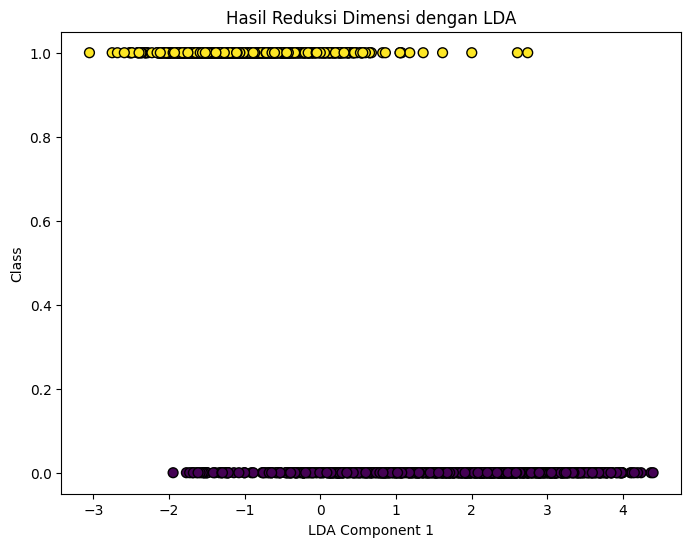

In [11]:
# Visualisasi data hasil LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda, y_train, c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Hasil Reduksi Dimensi dengan LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('Class')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Melatih model (contoh menggunakan Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_lda, y_train)

# Melakukan prediksi pada data test
y_pred = model.predict(X_test_lda)

# Evaluasi hasil
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
print(f"Akurasi  : {accuracy:.2f}")
print(f"Presisi  : {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

Hasil Evaluasi Model:
Akurasi  : 0.87
Presisi  : 0.88
Recall   : 0.91
F1-Score : 0.90

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.85      0.81      0.83       698
    Graduate       0.88      0.91      0.90      1117

    accuracy                           0.87      1815
   macro avg       0.87      0.86      0.86      1815
weighted avg       0.87      0.87      0.87      1815



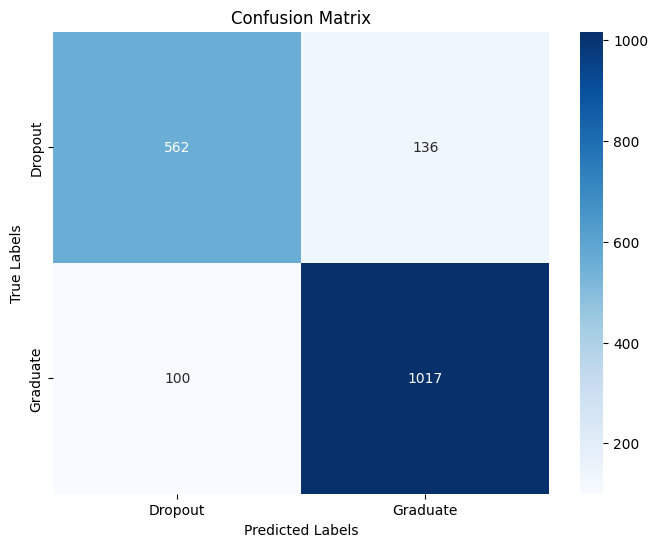

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Dropout', 'Graduate'], yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()